In [32]:
from sqlalchemy import create_engine, MetaData, inspect
import pandas as pd
import matplotlib.pyplot as plt
import os

In [2]:
def get_project_folder():
    return os.path.dirname(os.getcwd());

In [3]:
project_folder = get_project_folder()
db_path = project_folder + '\\data\\raw\\database.sqlite'

In [4]:
# Connecting to SQLite DB
engine = create_engine('sqlite:///' + db_path)
engine.connect()

In [5]:
print('Tables in the database')
print(engine.table_names())

Tables in the database
['artists', 'content', 'genres', 'labels', 'reviews', 'years']


In [43]:
m = MetaData(bind=engine)
m.reflect(engine)
ins = inspect(engine)
print(m.tables)

immutabledict({'artists': Table('artists', MetaData(bind=Engine(sqlite:///C:\Users\Andrew\Desktop\ChiPy_Spring2018\Kaggle\pitchfork\data\raw\database.sqlite)), Column('reviewid', INTEGER(), table=<artists>), Column('artist', TEXT(), table=<artists>), schema=None), 'content': Table('content', MetaData(bind=Engine(sqlite:///C:\Users\Andrew\Desktop\ChiPy_Spring2018\Kaggle\pitchfork\data\raw\database.sqlite)), Column('reviewid', INTEGER(), table=<content>), Column('content', TEXT(), table=<content>), schema=None), 'genres': Table('genres', MetaData(bind=Engine(sqlite:///C:\Users\Andrew\Desktop\ChiPy_Spring2018\Kaggle\pitchfork\data\raw\database.sqlite)), Column('reviewid', INTEGER(), table=<genres>), Column('genre', TEXT(), table=<genres>), schema=None), 'labels': Table('labels', MetaData(bind=Engine(sqlite:///C:\Users\Andrew\Desktop\ChiPy_Spring2018\Kaggle\pitchfork\data\raw\database.sqlite)), Column('reviewid', INTEGER(), table=<labels>), Column('label', TEXT(), table=<labels>), schema=N

In [44]:
def get_table_column_names(table_name):
    cols = ins.get_columns(table_name=table_name)
    return [d['name'] for d in cols]

In [66]:
print('artists table')
print('\n')
result = engine.execute("SELECT * FROM artists")
artists = pd.DataFrame(result.fetchall(), columns=get_table_column_names('artists'))
print(artists.head())
print('\n')

print('Number of reviews for each artist')
print('\n')
n_reviews_by_artist = artists.groupby('artist').count()
n_reviews_by_artist.columns = ['n_reviews']
print(n_reviews_by_artist.sort_values('n_reviews', ascending=False).head())

artists table


   reviewid          artist
0     22703  massive attack
1     22721        krallice
2     22659    uranium club
3     22661         kleenex
4     22661         liliput


Number of reviews for each artist


                     n_reviews
artist                        
various artists            688
guided by voices            23
neil young                  23
bonnie prince billy         22
the beatles                 21


reviews table


   reviewid                 title            artist  \
0     22703             mezzanine    massive attack   
1     22721          prelapsarian          krallice   
2     22659  all of them naturals      uranium club   
3     22661           first songs  kleenex, liliput   
4     22725             new start              taso   

                                                 url  score  best_new_music  \
0  http://pitchfork.com/reviews/albums/22703-mezz...    9.3               0   
1  http://pitchfork.com/reviews/albums/22721-prel...    7.9               0   
2  http://pitchfork.com/reviews/albums/22659-all-...    7.3               0   
3  http://pitchfork.com/reviews/albums/22661-firs...    9.0               1   
4  http://pitchfork.com/reviews/albums/22725-new-...    8.1               0   

           author               author_type    pub_date  pub_weekday  pub_day  \
0     nate patrin               contributor  2017-01-08            6        8   
1        zoe cam

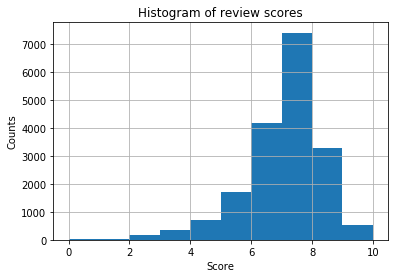

In [67]:
print('reviews table')
print('\n')
result = engine.execute("SELECT * FROM reviews")
reviews = pd.DataFrame(result.fetchall(), columns=get_table_column_names('reviews'))
print(reviews.head())

reviews['score'].hist()
plt.title('Histogram of review scores')
plt.xlabel('Score')
plt.ylabel('Counts')
plt.show()

In [62]:
print('content table')
print('\n')
result = engine.execute("SELECT * FROM content")
content = pd.DataFrame(result.fetchall(), columns=get_table_column_names('content'))
print(content.head())
print('\n')
print(content.content[0])

content table


   reviewid                                            content
0     22703  “Trip-hop” eventually became a ’90s punchline,...
1     22721  Eight years, five albums, and two EPs in, the ...
2     22659  Minneapolis’ Uranium Club seem to revel in bei...
3     22661  Kleenex began with a crash. It transpired one ...
4     22725  It is impossible to consider a given release b...


“Trip-hop” eventually became a ’90s punchline, a music-press shorthand for “overhyped hotel lounge music.” But today, the much-maligned subgenre almost feels like a secret precedent. Listen to any of the canonical Bristol-scene albums of the mid-late ’90s, when the genre was starting to chafe against its boundaries, and you’d think the claustrophobic, anxious 21st century started a few years ahead of schedule. Looked at from the right angle, trip-hop is part of an unbroken chain that runs from the abrasion of ’80s post-punk to the ruminative pop-R&B-dance fusion of the moment. The best of it has a

years table


   reviewid    year
0     22703  1998.0
1     22721  2016.0
2     22659  2016.0
3     22661  2016.0
4     22725  2016.0


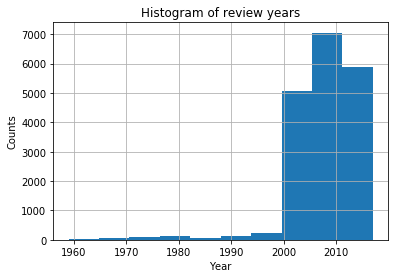

In [68]:
print('years table')
print('\n')
result = engine.execute("SELECT * FROM years")
years = pd.DataFrame(result.fetchall(), columns=get_table_column_names('years'))
print(years.head())

years['year'].hist()
plt.title('Histogram of review years')
plt.xlabel('Year')
plt.ylabel('Counts')
plt.show()

In [72]:
print('genres table')
print('\n')
result = engine.execute("SELECT * FROM genres")
genres = pd.DataFrame(result.fetchall(), columns=get_table_column_names('genres'))
print(genres.head())
print('\n')
print('Counts from each genre')
print(genres['genre'].value_counts())

genres table


   reviewid       genre
0     22703  electronic
1     22721       metal
2     22659        rock
3     22661        rock
4     22725  electronic


Counts from each genre
rock            9436
electronic      3874
experimental    1815
rap             1559
pop/r&b         1432
metal            860
folk/country     685
jazz             435
global           217
Name: genre, dtype: int64


In [74]:
print('labels table')
print('\n')
result = engine.execute("SELECT * FROM labels")
labels = pd.DataFrame(result.fetchall(), columns=get_table_column_names('labels'))
print(labels.head())
print('\n')
print('Counts from each record label')
print(labels['label'].value_counts())

labels table


   reviewid               label
0     22703              virgin
1     22721           hathenter
2     22659        static shock
3     22659  fashionable idiots
4     22661     kill rock stars


Counts from each record label
self-released                420
drag city                    272
sub pop                      268
thrill jockey                244
merge                        239
warp                         217
domino                       211
columbia                     207
matador                      202
warner bros.                 168
mute                         160
astralwerks                  151
interscope                   146
jagjaguwar                   145
secretly canadian            132
atlantic                     131
4ad                          126
kranky                       115
capitol                      115
rough trade                  114
virgin                       108
polyvinyl                    107
xl                           104
de